### Optimizing SVM Parameters using Dry Beans MultiClass Dataset

In [218]:
import pandas as pd
import numpy as np

Reading the dry beans dataset 

In [219]:
df = pd.read_csv('data.csv')

In [220]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

Counting NULL Values 

<AxesSubplot: >

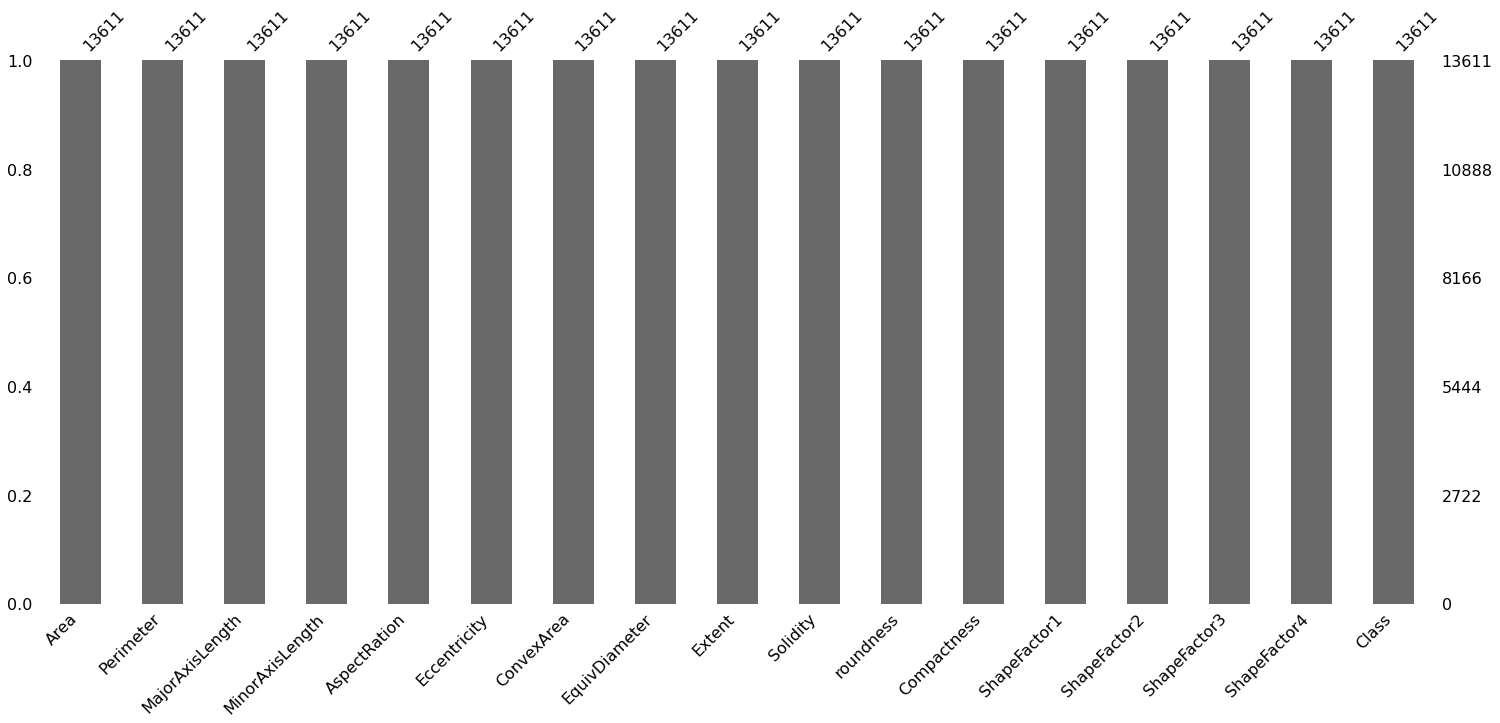

In [222]:
import missingno as ms
ms.bar(df)

Converting Categorical String Values of Bean type to Numerical using Label Encoding 

In [223]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])
df['Class'].unique()

array([5, 0, 1, 2, 4, 6, 3])

In [225]:
result_accuracies = []
result_nu = []
result_kernel = []
samples = []

Fitness Function -> Accuracy of Predcition

SVM is optimized using randomization 

In [228]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
scaler = StandardScaler()
import random
import copy
best_accuracy_list = []
best_iteration_list = []
    
def main(df):
    for i in range(10):
        df = df.sample(frac=1)
        X = df.iloc[:,0:16]
        y = df.iloc[:,16]
        X = np.array(X)
        y = np.array(y)
        x_scaled = scaler.fit_transform(X)
        y = y.reshape(-1,1)
        y = y[:,0]
        X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.3, random_state=42, shuffle=True)
        best_accuracy = 0
        best_kernel = ''
        best_nu = 0
        kernels = ['linear', 'poly', 'rbf', 'sigmoid']
        iteration_list = []
        accuracy_list = []
        global_best_accuracy = 0
        for j in range(100):

            random_nu = random.uniform(0.00, 0.21)
            kernel_index = np.random.randint(0,4)
            random_kernel = kernels[kernel_index]
            clf = NuSVC(nu=random_nu, kernel=random_kernel)
            clf.fit(X_train, y_train)
            y_predict = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_predict)
            accuracy_list.append(accuracy)
            iteration_list.append(j)
            if(accuracy > best_accuracy):
                best_accuracy = accuracy
                best_nu = random_nu
                best_kernel = random_kernel

        result_accuracies.append(best_accuracy)
        result_nu.append(best_nu)
        result_kernel.append(best_kernel)
        global best_accuracy_list
        global best_iteration_list   
        if(global_best_accuracy < best_accuracy):
            global_best_accuracy = best_accuracy
            best_accuracy_list = copy.deepcopy(accuracy_list)
            best_iteration_list = copy.deepcopy(iteration_list)
        samples.append(i)        

        

In [229]:
main(df)

Creating table for results 

In [230]:
results = pd.DataFrame({

    'Sample': samples,
    'Best Accuracy': result_accuracies,
    'Best Nu': result_nu,
    'Best Kernel': result_kernel    
})

In [232]:
print(results)

    Sample  Best Accuracy   Best Nu Best Kernel
0        0       0.926053  0.165550         rbf
1        1       0.921156  0.148394         rbf
2        0       0.924584  0.170249         rbf
3        1       0.921156  0.120313         rbf
4        2       0.924094  0.158152         rbf
5        3       0.922625  0.156359         rbf
6        4       0.925808  0.157657         rbf
7        5       0.925563  0.161721         rbf
8        6       0.917728  0.187204         rbf
9        7       0.929481  0.171739         rbf
10       8       0.921890  0.149567         rbf
11       9       0.928012  0.141932         rbf


In [235]:
best_accuracy_list = np.array(best_accuracy_list)
best_iteration_list = np.array(best_iteration_list)

Printing Fitness Function value vs Number of Iterations 

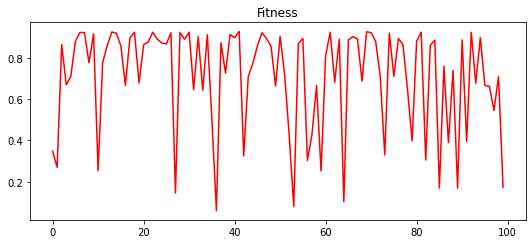

In [236]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.title("Fitness")
plt.plot(best_iteration_list, best_accuracy_list, color="red")

plt.show()